### Project Introduction

The data in this project focuses on numbers of species across 4 major national parks in the United States.

This project will attempt to answer the following questions from the data provided by National Parks Service.

1. Which species appear in which park the most?
2. Is there a significant difference between species and their conservation status?
3. Are certain types of species more likely to be endangered? 

### Import libraries, Loading Data, Getting Familiar 

In [171]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [172]:
#load the data from the provided 'species_info' and 'observation' csv files
species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')


In [173]:
print(species.columns)
print(observations.columns)

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')
Index(['scientific_name', 'park_name', 'observations'], dtype='object')


### Dealing with Missing Data

In [174]:
# check how many null values exist: 
# what are different data types in the data set?

print(observations.info(memory_usage= False))
print('\n')
print(species.info(memory_usage= False))

# 5824-191 = 5633: There are 5633 missing(null) rows in the conversation status.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)None


In [175]:
# Let's look at if missing data is systematic or if it's random before we try to deal with it.
print(species[species.conservation_status.notnull()])
print(species[species.conservation_status.isnull()])
species.conservation_status.value_counts(dropna=False)



            category                   scientific_name  \
7             Mammal                     Canis latrans   
8             Mammal                       Canis lupus   
9             Mammal                       Canis rufus   
29            Mammal                  Eptesicus fuscus   
30            Mammal         Lasionycteris noctivagans   
...              ...                               ...   
5302  Vascular Plant             Callitriche marginata   
5399  Vascular Plant  Camissonia sierrae ssp. alticola   
5426  Vascular Plant                Epilobium oreganum   
5436  Vascular Plant              Botrychium ascendens   
5676  Vascular Plant                  Romneya coulteri   

                                           common_names conservation_status  
7                                                Coyote  Species of Concern  
8                                             Gray Wolf          Endangered  
9                                              Red Wolf          Enda

NaN                   5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64

In [176]:
# It appears that the missing rows are structurally missing data.
# The reason why the data is missing in the conservation status column is presumably,
# because the species in question is not under any conservation
species.conservation_status.fillna('Not Applicable',inplace=True)
print(species.conservation_status.value_counts(dropna=False))

Not Applicable        5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64


In [177]:
# It appears that scientific name is common between two csv files/datasets. Let's count how many unique scientific names are in species dataframe
# and see if it matches total count of rows. If it does, it probably indicates that the species_info file is a database of all distinct species names. 

print(species.scientific_name.value_counts(dropna=False))
print(species.scientific_name.count()) # This is the total count of scientific_names 
species[species.scientific_name=='Castor canadensis'] # This is an example of a duplicate
# explore duplicated values 
species['dup_scientific_name']= species.scientific_name.duplicated(False)
species[species.dup_scientific_name == True]
#This showed that scientific name is duplicated when multiple common names exist for the same species


Castor canadensis            3
Canis lupus                  3
Hypochaeris radicata         3
Columba livia                3
Puma concolor                3
                            ..
Carex                        1
Hexastylis shuttleworthii    1
Hexastylis heterophylla      1
Hexastylis arifolia          1
Tribulus terrestris          1
Name: scientific_name, Length: 5541, dtype: int64
5824


,category,scientific_name,common_names,conservation_status,dup_scientific_name
4,Mammal,Cervus elaphus,Wapiti Or Elk,Not Applicable,True
5,Mammal,Odocoileus virginianus,White-Tailed Deer,Not Applicable,True
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",Not Applicable,True
8,Mammal,Canis lupus,Gray Wolf,Endangered,True
10,Mammal,Urocyon cinereoargenteus,"Common Gray Fox, Gray Fox",Not Applicable,True
...,...,...,...,...,...
5619,Vascular Plant,Panicum rigidulum var. rigidulum,"Redtop Panicgrass, Redtop Panicum",Not Applicable,True
5638,Vascular Plant,Setaria pumila,"Cattail Grass, Yellow Bristle Grass, Yellow Br...",Not Applicable,True
5640,Vascular Plant,Vulpia bromoides,"Brome Fescue, Brome Six-Weeks Grass, Desert Fe...",Not Applicable,True
5643,Vascular Plant,Vulpia myuros,"Foxtail Fescue, Rattail Fescue, Rat-Tail Fescu...",Not Applicable,True


In [178]:
#Now let's look at the duplicates in the common_names column...

species['dup_common_name'] =species.common_names.duplicated(False)
print(species.common_names.value_counts(dropna=False)) 
# There are duplicates in the common_names as well. 
# Let's see the data to understand if they're typos.


Brachythecium Moss                                                            7
Dicranum Moss                                                                 7
Panic Grass                                                                   6
Bryum Moss                                                                    6
Sphagnum                                                                      6
                                                                             ..
Pine                                                                          1
Red Spruce                                                                    1
Norway Spruce                                                                 1
Fraser Fir                                                                    1
Bullhead, Caltrop, Goathead, Mexican Sandbur, Puncture Vine, Texas Sandbur    1
Name: common_names, Length: 5504, dtype: int64


In [179]:
duplicates_common_name = species[(species.dup_common_name == True) ]
duplicates_scientific_name = species[(species.dup_scientific_name == True) ]

### Cleaning/Wranglig Data Types

In [180]:
# category, and conservation_status columns are categorical data so let's dig into them and see if there are any categorical names that has a typo
# and if we can quickly clean that up. First let's count unique/distinct values
print(species.conservation_status.nunique()) # There are 4 distinct statuses
print(species.conservation_status.unique())

print('\n');print(species.category.nunique())# There are 7 distinct categories
print(species.category.unique())

#need to associate a ranking to differnet levels of conservation status
# per https://www.iucnredlist.org/ and ranking is as follows: 
# Not Evaluated, Data Deficient, Least Concern, Near Threatened, Vulnerable, Endangered, Critically Endangered, Extinct in the Wild and Extinct.
# Dataset shall have the following order: Species of Concern <Threatened < Endangered < In Recovery
#CategoricalDtype() # Another way to convert type to categorical, but prefer using pandas method Categorical in this project to prevent unnecessary library import
species['conservation_status'] = pd.Categorical(values= species.conservation_status, categories=['Not Applicable','Species of Concern', 'Threatened', 'Endangered','In Recovery'], ordered = True)
species['category'] =pd.Categorical(values= species.category,categories=['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish' ,'Vascular Plant','Nonvascular Plant'])

print('\n'); print(species.dtypes)

# observation seems to be a numerical value, so let's convert that to an integer, since it's a count.
observations.observations.astype('int')
print('\n'); print(observations.dtypes)
observations.observations.value_counts() 


5
['Not Applicable' 'Species of Concern' 'Endangered' 'Threatened'
 'In Recovery']


7
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


category               category
scientific_name          object
common_names             object
conservation_status    category
dup_scientific_name        bool
dup_common_name            bool
dtype: object


scientific_name    object
park_name          object
observations        int64
dtype: object


84     220
85     210
91     206
92     203
95     202
      ... 
9        1
321      1
303      1
314      1
310      1
Name: observations, Length: 304, dtype: int64

### Merging Dataframes

In [181]:
print(observations.scientific_name.nunique())
# There are 5541 unique species in the observations dataset
print(species.scientific_name.nunique())
# There are 5541 unique species in the species dataset

# This means that it will likely be a 1:1 match once we merge two datasets together. 
# Left merge is used on the scientific_name column as that's the only shared column between the tables.
df=pd.merge(observations,species,how='left',on='scientific_name')


5541
5541


In [182]:
#let's clean the df dataframe
df.drop(columns=['dup_common_name','dup_scientific_name','common_names'],inplace=True)
df.drop_duplicates(inplace=True)


### Descriptive Statistics
Let's gather some quick stats
1. How many different species in each park?
2. How many species on average in each park?
3. What is the top 10 most observed species across all national parks?
4. Which national park has the most endangered species?
5. Which category, on average, has the most endangered species?
5. For each conservation status, what is the ratio of each species category? (pie chart) 


In [183]:
# 1. How many different species in each park? There are more than 5820 species in each park.
df_size= df.groupby('park_name').size()
#df_size= df_size[df_size.observations != 0]
df_size
#sns.countplot(x='',y='',data=df_grouped,)

park_name
Bryce National Park                    5828
Great Smoky Mountains National Park    5823
Yellowstone National Park              5824
Yosemite National Park                 5826
dtype: int64

In [184]:
# 2. How many species on average in each park? 

print('\nYellowstone has the highest number of species averaging around 250 different kinds.\n')
df_group_1 = df.groupby('park_name').observations.aggregate(['min', 'max','mean','sum'])
df_group_1



Yellowstone has the highest number of species averaging around 250 different kinds.



,min,max,mean,sum
park_name,,,,
Bryce National Park,9,176,98.866678,576195
Great Smoky Mountains National Park,10,147,74.109050,431537
Yellowstone National Park,57,321,247.770604,1443016
Yosemite National Park,31,223,148.164950,863209


In [185]:
# 3. What is the top 10 most observed species across all national parks?

print('\nTop 10 Species Names by Total Count\n')
df_group_2= df.groupby(['scientific_name']).observations.aggregate(['sum'])
df_group_2.sort_values('sum',ascending=False,inplace=True)
df_group_2 = df_group_2.iloc[:10]
df_group_2


Top 10 Species Names by Total Count



,sum
scientific_name,
Holcus lanatus,1780
Castor canadensis,1725
Hypochaeris radicata,1720
Puma concolor,1711
Procyon lotor,1692
Columba livia,1653
Oncorhynchus mykiss,1626
Myotis lucifugus,1547
Streptopelia decaocto,1530


In [186]:
# 4a. Total endangered species count per national park and category
# This would be cool to show on a US map with different size circles.

print('\nMean Observation of Species by National Park and Category\n')
df_group_3_sum=df.pivot_table(index=['park_name'],columns='category',values='observations',aggfunc=['sum'])
df_group_3_sum = df_group_3_sum.droplevel(0,axis=1)
df_group_3_sum



Mean Observation of Species by National Park and Category



category,Mammal,Bird,Reptile,Amphibian,Fish,Vascular Plant,Nonvascular Plant
park_name,,,,,,,
Bryce National Park,20680,51647,7950,7380,12587,442959,32992
Great Smoky Mountains National Park,15071,37728,5691,5707,9306,333177,24857
Yellowstone National Park,50869,126996,19554,19440,30946,1112190,83021
Yosemite National Park,30535,76207,11483,11444,18792,664965,49783


In [187]:
# 4b. Average endangered species count per national park and category

print('\nMean Observation of Species by National Park and Category\n')
df_group_3_mean= df.pivot_table(index=['park_name'],columns='category',values='observations',aggfunc=['mean']).round().astype(int)
df_group_3_mean = df_group_3_mean.droplevel(0,axis=1)
df_group_3_mean



Mean Observation of Species by National Park and Category



category,Mammal,Bird,Reptile,Amphibian,Fish,Vascular Plant,Nonvascular Plant
park_name,,,,,,,
Bryce National Park,95,99,101,92,98,99,99
Great Smoky Mountains National Park,69,72,72,71,72,75,75
Yellowstone National Park,236,244,248,243,240,249,249
Yosemite National Park,141,146,145,143,146,149,149


In [188]:
# 5. Which category has the most endangered species on average?
#df_group_4= df.groupby(['conservation_status','category']).observations.aggregate(['sum'])

# null values in the conservation status column likely represent species not categorized for conservation, i.e not under conservation.
print('\nMean Observation of Species by Category and Conservation Status\n')
df_group_4=df.pivot_table(index='category',columns='conservation_status',values='observations',aggfunc=['mean'],fill_value=(0)).round().astype(int)
df_group_4.loc['Total']=df_group_4.sum()
df_group_4['mean','Grand Total']=df_group_4.sum(axis=1) #adds a total line to the right of pivot table
df_group_4= df_group_4.droplevel(0,axis=1)
df_group_4



Mean Observation of Species by Category and Conservation Status



conservation_status,Not Applicable,Species of Concern,Threatened,Endangered,In Recovery,Grand Total
category,,,,,,
Mammal,142,129,72,46,60,449
Bird,144,127,0,36,116,423
Reptile,142,127,0,0,0,269
Amphibian,141,128,70,36,0,375
Fish,144,132,82,38,0,396
Vascular Plant,143,129,69,40,0,381
Nonvascular Plant,143,135,0,0,0,278
Total,999,907,293,196,176,2571


### Plots
1. Average species count
2. Average species count per category and national park
3. 'Endangered' species count per national park
4. 'Endangered' species count per category

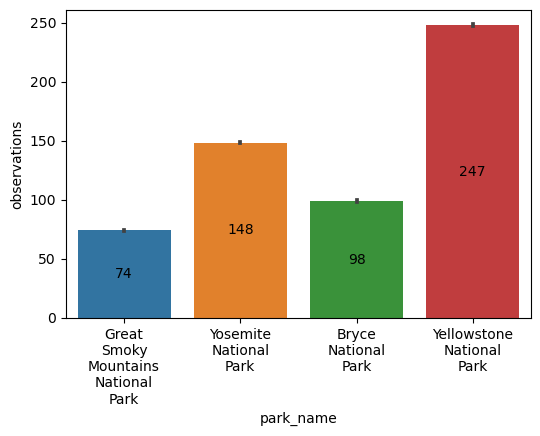

In [189]:
#Total species count per national park
fig, ax = plt.subplots(figsize=(6, 4))
#observations.groupby('park_name').mean()
sns.barplot(x='park_name', y='observations',data=observations) #creates plot
#inserts new line in between each work in x tick labels.
#from here
xlabels_new=[]
for label in ax.xaxis.get_ticklabels():
    xlabels_new.append(label.get_text().replace(' ','\n'))
ax.set_xticklabels(xlabels_new) 
# up to here
ax.bar_label(ax.containers[-1], fmt='%d', label_type='center') #annotates in the center of bars 
#ax.tick_params(axis='x', labelrotation =10) # not needed because there is a break in between each word in x tick labels

plt.title('')
plt.show()

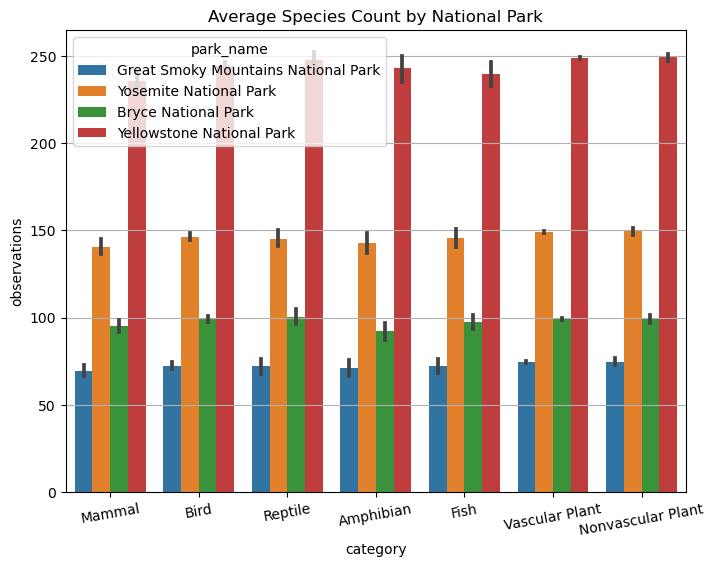

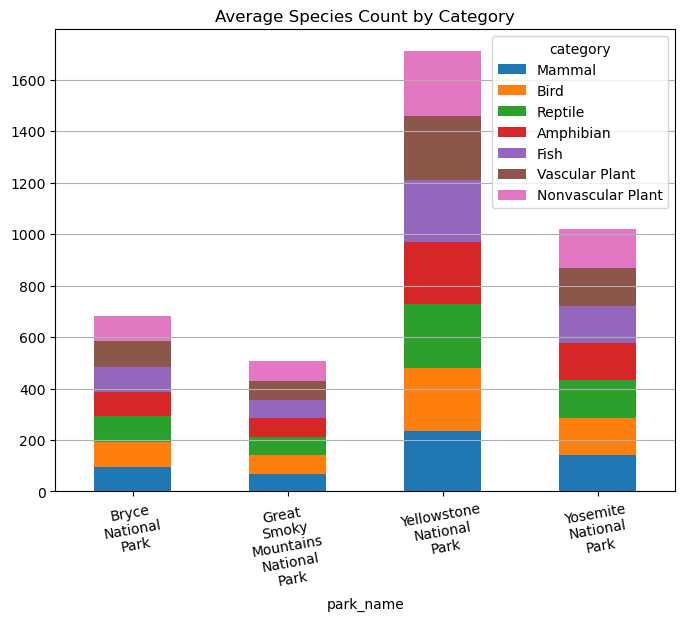

In [190]:
#Number of species per category and national park

fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='category', y='observations',hue='park_name',data=df)
ax.tick_params(axis='x', labelrotation =10)
ax.grid(axis='y')
plt.title('Average Species Count by National Park')
plt.show()
plt.clf()
%matplotlib inline


#stacked bar plot view

ax= df_group_3_mean.plot(kind='bar',stacked=True,figsize=(8,6))

xlabels_new=[]
for label in ax.xaxis.get_ticklabels():
    xlabels_new.append(label.get_text().replace(' ','\n'))
ax.set_xticklabels(xlabels_new) 
ax.tick_params(axis='x', labelrotation =10)
ax.grid(axis='y')
plt.title('Average Species Count by Category')
plt.show()
plt.clf()
%matplotlib inline


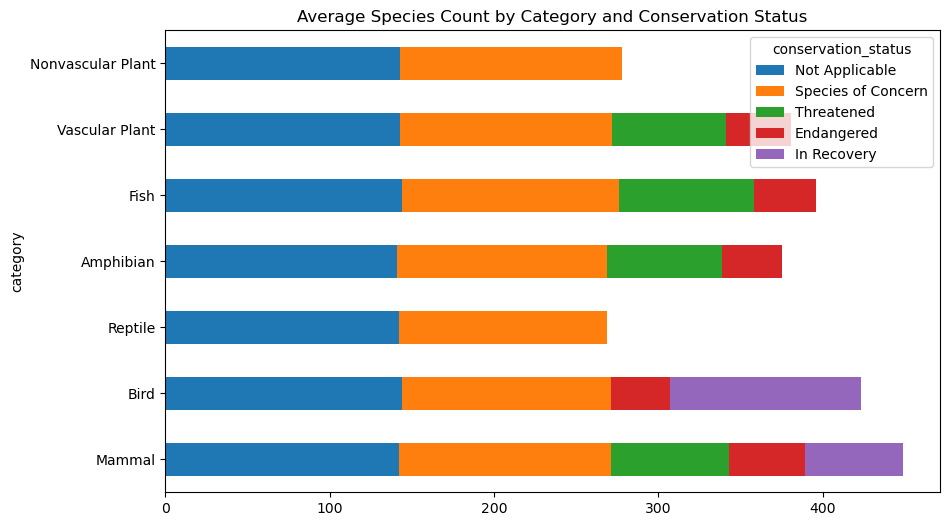

In [191]:
#Number of endangered species for each national park
df_group_4=df.pivot_table(index='category',columns='conservation_status',values='observations',aggfunc=['mean'],fill_value=(0)).round().astype(int)
df_group_4= df_group_4.droplevel(0,axis=1)
df_group_4.plot(kind='barh', stacked=True, figsize=(10,6))
plt.title('Average Species Count by Category and Conservation Status')
plt.show()
plt.clf()
%matplotlib inline

